In [5]:
%matplotlib notebook

In [6]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Source data location
source_file = 'source_data/housing_data_cleaned.csv'

In [7]:
# Read in source dataset - cleaned file after running 1_housing_etl.ipynb
housing_df = pd.read_csv(source_file,low_memory=False)
housing_df.head()

,basements,building_code_description,category_code_description,census_tract,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,...,topography,total_area,total_livable_area,type_heater,unit,view_type,year_built,year_built_estimate,zip_code,zoning
0,D,ROW 3 STY MASONRY,Single Family,241.0,N,67.0,49200,0,4.0,0.0,...,F,938.00,1344.0,A,NaN,I,1895,Y,19144,RSA5
1,NaN,ROW 2 STY MASONRY,Single Family,201.0,NaN,70.0,0,0,4.0,0.0,...,F,1044.00,1190.0,NaN,NaN,I,1940,Y,19140,RM1
2,H,ROW B/GAR 2 STY MASONRY,Single Family,281.0,N,95.5,0,0,4.0,0.0,...,F,1686.53,1633.0,B,NaN,I,1940,Y,19141,RSA3
3,NaN,ROW 2 STY MASONRY,Single Family,293.0,NaN,112.5,0,0,4.0,0.0,...,F,2165.62,1320.0,B,NaN,I,1940,Y,19124,RSA5
4,NaN,ROW 2 STY MASONRY,Single Family,62.0,NaN,79.0,0,0,4.0,0.0,...,F,1264.00,960.0,NaN,NaN,I,1920,NaN,19142,RM1


## Is Bigger Always Better?
* Total Livable Area vs Sale Price
* Total Number of Rooms vs Sale Price

<IPython.core.display.Javascript object>


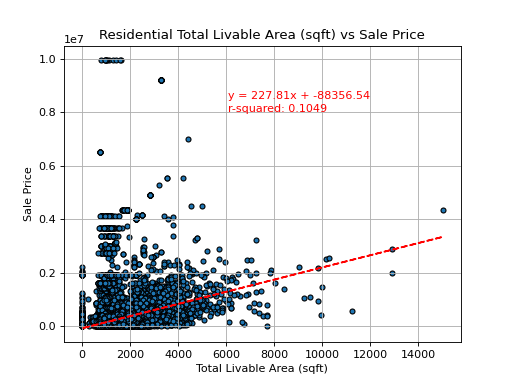

In [12]:
# Create scatter plot for relationship between total liveable area and sale price
# Residential zoning, < 10000 sq ft

#zoning_list = ['RM1','RM2','RM3','RM4','RMX1','RMX2','RMX3','RSA1','RSA2','RSA3','RSA4','RSA5','RSD1','RSD2','RSD3','RTA1']


# Only residential zoning, <= 10000 sq ft 
#residential_zoning_df = housing_df.loc[(housing_df['total_livable_area'] <= 10000)&
#                                       (housing_df['zoning'].isin(zoning_list))&
#                                       (housing_df['number_of_rooms'] > 0),:]

# 1.) Create figure and plot
livable_area_vs_price_single_scatter = housing_df.plot.scatter(x='total_livable_area',y='sale_price',grid=True,edgecolors='black')
livable_area_vs_price_single_scatter.set_xlabel("Total Livable Area (sqft)")
livable_area_vs_price_single_scatter.set_ylabel("Sale Price")
livable_area_vs_price_single_scatter.set_title("Residential Total Livable Area (sqft) vs Sale Price")

plt.show()
#plt.tight_layout()



In [13]:
# Regression/Correlation Analysis for Residential zoning/sq ft

# Calculate linear regression model

# Create series for independent and dependent variables
total_livable_area = housing_df['total_livable_area']
sale_price = housing_df['sale_price']

# Create linear regression model
calc_slope, calc_int, calc_r, calc_p, calc_std_err = linregress(total_livable_area, sale_price)
line_best_fit = calc_slope * total_livable_area + calc_int

# Add line of best fit to above plot
plt.plot(total_livable_area,line_best_fit,'r--')

# Add regression equation and r^2 value to above plot
line_eq = "y = " + str(round(calc_slope,2)) + "x + " + str(round(calc_int,2))
plt.annotate(line_eq,(6100,8500000),fontsize=10,color="red")
r_squared = calc_r ** 2
plt.annotate('r-squared: ' + str(round(r_squared,4)),(6100,8000000),fontsize=10,color="red")

# Add analysis to figure
# NOTE: approach taken from https://stackoverflow.com/questions/43158914/issues-with-adding-figtext-to-bottom-of-subplots
# text = f'\n\n\n\nWhen calculating a regression model between Total Livable Area and Sale Price, the line of best fit is {line_eq} and the r-squared value is {str(round(r_squared,4))}. This implies that there is a slight positive relationship between total livable area and sale price, but only about 10% of the variation in sale price is explained by the total livable area. As such, it seems that size is only a minor factor in determining residential house prices in Philadelphia.'
# plt.subplots_adjust(bottom=0.3)
# plt.figtext(x=.05,y=.1,s=text,wrap=True,fontsize=7)

# plt.savefig(output_png_path + 'northern_hemisphere_temp_vs_latitude_regression.png')

Text(6100, 8000000, 'r-squared: 0.1049')

<IPython.core.display.Javascript object>


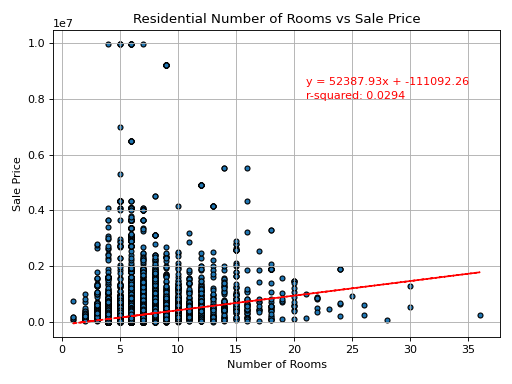

In [14]:
# Create scatter plot for relationship number of rooms and sale price
# Residential zoning, < 10000 sq ft
# Create scatter plot for relationship between total liveable area and sale price
# Residential zoning, < 10000 sq ft

# zoning_list = ['RM1','RM2','RM3','RM4','RMX1','RMX2','RMX3','RSA1','RSA2','RSA3','RSA4','RSA5','RSD1','RSD2','RSD3','RTA1']


# Only analyze single family
# residential_zoning_df = housing_df.loc[(housing_df['total_livable_area'] <= 10000)&
#                                        (housing_df['zoning'].isin(zoning_list))&
#                                        (housing_df['number_of_rooms'] > 0),:]

# 1.) Create figure and plot
number_rooms_vs_price_single_scatter = housing_df.plot.scatter(x='number_of_rooms',y='sale_price',grid=True,edgecolors='black')
number_rooms_vs_price_single_scatter.set_xlabel("Number of Rooms")
number_rooms_vs_price_single_scatter.set_ylabel("Sale Price")
number_rooms_vs_price_single_scatter.set_title("Residential Number of Rooms vs Sale Price")

plt.show()
plt.tight_layout()

In [15]:
# Regression/Correlation Analysis for Residential zoning/sq ft

# Calculate linear regression model

# Create series for independent and dependent variables
number_of_rooms = housing_df['number_of_rooms']
sale_price = housing_df['sale_price']

# Create linear regression model
calc_slope, calc_int, calc_r, calc_p, calc_std_err = linregress(number_of_rooms, sale_price)
line_best_fit = calc_slope * number_of_rooms + calc_int

# Add line of best fit to above plot
plt.plot(number_of_rooms,line_best_fit,'r--')

# Add regression equation and r^2 value to above plot
line_eq = "y = " + str(round(calc_slope,2)) + "x + " + str(round(calc_int,2))
plt.annotate(line_eq,(21,8500000),fontsize=10,color="red")
r_squared = calc_r ** 2
plt.annotate('r-squared: ' + str(round(r_squared,4)),(21,8000000),fontsize=10,color="red")

# Add analysis to figure
# NOTE: approach taken from https://stackoverflow.com/questions/43158914/issues-with-adding-figtext-to-bottom-of-subplots
# text = f'\n\n\n\nWhen calculating a regression model between Number of Rooms and Sale Price, the line of best fit is {line_eq} and the r-squared value is {str(round(r_squared,4))}. The slope is indicating a positive relationship, but the r-squared value implies that only 3% of the variation in Sale Price is explained by total number of rooms. As such, it seems that other factors contribute much more greatly to housing prices that number of rooms.'
# plt.subplots_adjust(bottom=0.3)
# plt.figtext(x=.05,y=.1,s=text,wrap=True,fontsize=7)


Text(21, 8000000, 'r-squared: 0.0294')

## ----- Other -----

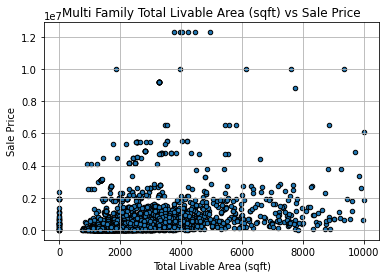

<Figure size 432x288 with 0 Axes>

In [6]:
# Create scatter plot for relationship between total liveable area and sale price

# Only analyze multi family
multi_family_df = housing_df.loc[(housing_df['category_code_description'] == 'Multi Family')&
                                 (housing_df['total_livable_area'] <= 10000),:]

# 1.) Create figure and plot
livable_area_vs_price_scatter_multi = multi_family_df.plot.scatter(x='total_livable_area',y='sale_price',grid=True,edgecolors='black')
livable_area_vs_price_scatter_multi.set_xlabel("Total Livable Area (sqft)")
livable_area_vs_price_scatter_multi.set_ylabel("Sale Price")
livable_area_vs_price_scatter_multi.set_title("Multi Family Total Livable Area (sqft) vs Sale Price")

plt.show()
plt.tight_layout()

In [ ]:
# Regression/Correlation Analysis for Multi Family

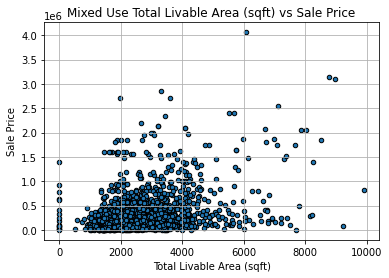

<Figure size 432x288 with 0 Axes>

In [7]:
# Create scatter plot for relationship between total liveable area and sale price

# Only analyze mixed use
mixed_use_df = housing_df.loc[(housing_df['category_code_description'] == 'Mixed Use')&
                               (housing_df['total_livable_area'] <= 10000),:]

# 1.) Create figure and plot
livable_area_vs_price_scatter_mixed = mixed_use_df.plot.scatter(x='total_livable_area',y='sale_price',grid=True,edgecolors='black')
livable_area_vs_price_scatter_mixed.set_xlabel("Total Livable Area (sqft)")
livable_area_vs_price_scatter_mixed.set_ylabel("Sale Price")
livable_area_vs_price_scatter_mixed.set_title("Mixed Use Total Livable Area (sqft) vs Sale Price")

plt.show()
plt.tight_layout()

In [ ]:
# Regression/Correlation Analysis for Mixed Use